# THRESHOLD: Supplementary material

## Preamble

In [1]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({'font.size': 15})
plt.rc('axes', labelsize=20)
plt.rcParams['xtick.labelsize'] = 20
plt.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rcParams['pdf.fonttype'] = 42

module_path = os.path.abspath('../src/')
if module_path not in sys.path:
    sys.path.append(module_path)

import utils as ut
import plots as pt

path_cwd = os.getcwd()
print(path_cwd)

/Users/alfonso/workshop/threshold/notebooks


## Reconstructing demographic and contact patterns

Reciprocity holds for the matrix.


UnboundLocalError: local variable 'rebuilt_pop_a' referenced before assignment

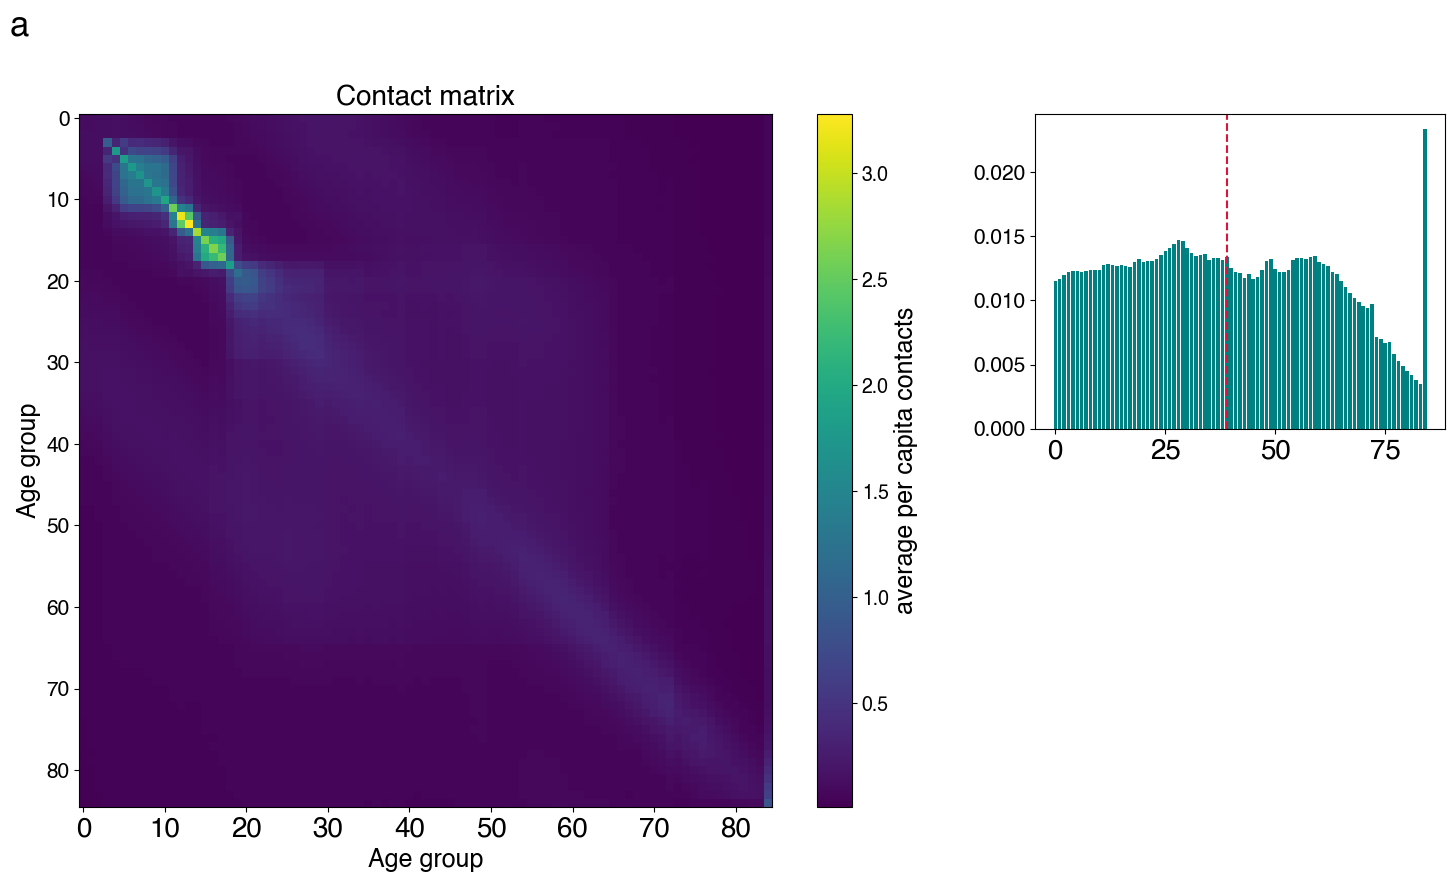

In [7]:
model_region ='National'
flag_rebuild = False
flag_compare = False
path_source = os.path.join(path_cwd, '..')

pt.plot_state_age_structure_data(model_region, flag_rebuild=flag_rebuild, flag_compare=flag_compare, path_cwd=path_source)

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


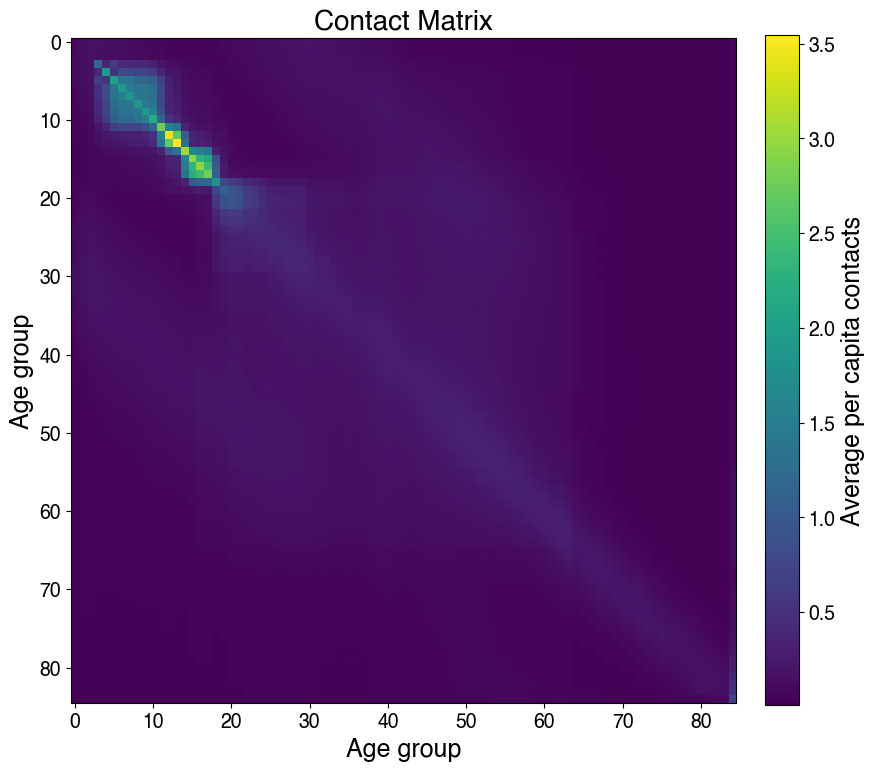

In [8]:
def plot_contact_matrix(
        model_region, 
        path_cwd='',
        flag_rebuild=False
    ):
    path_source = path_cwd

    # Import the contact matrix
    data_contact = ut.import_contact_matrix(state=model_region, path=path_source)

    # Create a new figure and axis
    fig, ax1 = plt.subplots(figsize=(9, 9))

    if flag_rebuild:
        # Update the contact matrix if rebuilding
        data_new_contact = ut.update_contact_matrix(
            data_contact,
            old_pop_a=ut.import_age_distribution(state=model_region, path=path_source),
            new_pop_a=ut.import_age_distribution(state=model_region, reference=False, year=2019, path=path_source)
        )
        im = ax1.matshow(data_new_contact, cmap='viridis')
        ax1.set_title('Updated Contact Matrix', fontsize=20)
    else:
        # Plot the original contact matrix
        im = ax1.matshow(data_contact, cmap='viridis')
        ax1.set_title('Contact Matrix', fontsize=20)

    # Add the colorbar
    cb = fig.colorbar(im, ax=ax1, fraction=0.046, pad=0.04)
    cb.ax.tick_params(labelsize=14)
    cb.set_label('Average per capita contacts', fontsize=18)

    # Set axis labels
    ax1.set_xlabel('Age group', fontsize=18)
    ax1.set_ylabel('Age group', fontsize=18)
    ax1.xaxis.set_ticks_position('bottom')

    # Customize tick parameters
    ax1.tick_params(axis='both', which='major', labelsize=14)
    ax1.tick_params(axis='both', which='minor', labelsize=8)

    # Adjust layout
    plt.tight_layout()

    # Save the plot
    full_path = os.path.join(path_source, 'figures')
    base_name = f'contact_matrix_{model_region}_rebuilt_{flag_rebuild}'
    if not os.path.exists(full_path):
        os.makedirs(full_path)

    for ext in ['pdf', 'png']:
        plt.savefig(os.path.join(full_path, base_name + f'.{ext}'), format=ext, bbox_inches='tight')

    # Display the plot
    plt.show()

model_region ='National'
flag_rebuild = True
flag_compare = True
path_source = os.path.join(path_cwd, '..')

plot_contact_matrix(model_region=model_region, path_cwd=path_source)
